<a href="https://colab.research.google.com/github/AnVo01/AI/blob/AI/Cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense,Flatten

(x_train,y_train),(x_test,y_test) = cifar100.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255
y_train = np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)

model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(1000,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(100,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=SGD(learning_rate = 0.005, momentum=0.9),metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=128,epochs=30,verbose=1,validation_data=(x_test,y_test))

Epoch 1/30
391/391 [==============================] - 24s 60ms/step - loss: 4.1689 - accuracy: 0.0746 - val_loss: 3.9167 - val_accuracy: 0.1136
Epoch 2/30
391/391 [==============================] - 23s 59ms/step - loss: 3.7614 - accuracy: 0.1352 - val_loss: 3.7094 - val_accuracy: 0.1471
Epoch 3/30
391/391 [==============================] - 23s 60ms/step - loss: 3.6000 - accuracy: 0.1658 - val_loss: 3.6048 - val_accuracy: 0.1693
Epoch 4/30
391/391 [==============================] - 23s 59ms/step - loss: 3.4880 - accuracy: 0.1836 - val_loss: 3.5256 - val_accuracy: 0.1802
Epoch 5/30
391/391 [==============================] - 24s 60ms/step - loss: 3.3969 - accuracy: 0.1998 - val_loss: 3.4700 - val_accuracy: 0.1872
Epoch 6/30
391/391 [==============================] - 23s 60ms/step - loss: 3.3211 - accuracy: 0.2124 - val_loss: 3.3984 - val_accuracy: 0.2063
Epoch 7/30
391/391 [==============================] - 24s 60ms/step - loss: 3.2471 - accuracy: 0.2279 - val_loss: 3.3610 - val_accuracy:

In [ ]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  3.167163372039795
độ chính xác kiểm tra là:  0.2705000042915344


In [ ]:
predictions=model.predict(x_test)

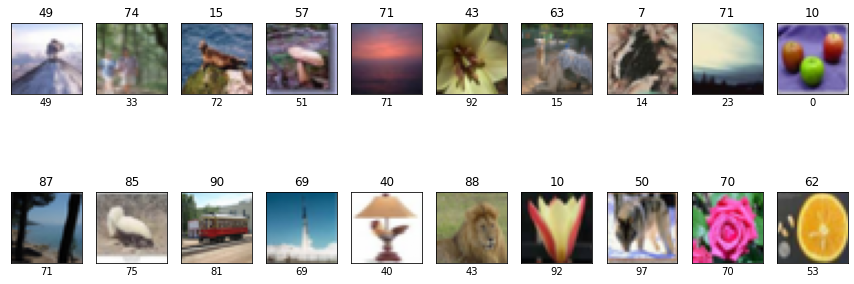

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
for i in range(20):
  plt.subplot(5, 10, i+1)
  plt.imshow(x_test[i])
  plt.title( np.argmax(model.predict(x_test[i].reshape((-1, 32, 32, 3)))))
  plt.xlabel(np.argmax(y_test[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()
#title is predicted image
#xlabel is  reality image

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model.save('/content/gdrive/MyDrive/AI/Cifar100.h5')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/gdrive/MyDrive/AI/Cifar100.h5')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 1000)              3073000   
                                                                 
 dense_4 (Dense)             (None, 512)               512512    
                                                                 
 dense_5 (Dense)             (None, 100)               51300     
                                                                 
Total params: 3,636,812
Trainable params: 3,636,812
Non-trainable params: 0
_________________________________________________________________


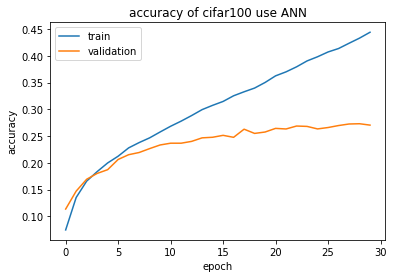

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of cifar100 use ANN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()